# 동심원 데이터 클러스터링

In [9]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [10]:
# 클러스터 결과를 담은 df와 사이킷런의 클러스터 객체 등을 인자로 받아 클러스터링 결과를 시각화
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
  if iscenter:
    centers = clusterobj.cluster_centers_

  unique_labels = np.unique(dataframe[label_name].values)
  markers = ['o', 's', '^', 'x', '*']
  isNoise=False

  for label in unique_labels:
    label_cluster = dataframe[dataframe[label_name] == label]
    if label == -1:
      cluster_legend = 'Noise'
      isNoise = True
    else:
      cluster_legend = 'Cluster ' + str(label)

    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70, edgecolor='k', marker=markers[label], label=cluster_legend)

    if iscenter:
      center_x_y = centers[label]
      plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
      plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
  if isNoise:
    legend_loc = 'upper center'
  else: legend_loc = 'upper right'

  plt.legend(loc=legend_loc)
  plt.show()


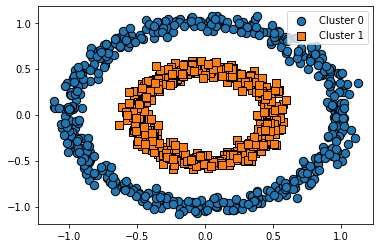

In [11]:
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

convex 하지 않은 동심원 데이터

볼록집합 (convex set) : 집합 내 두 점을 연결한 선분이 항상 집합에 포함되면 볼록집합

## kmeans를 통한 군집화

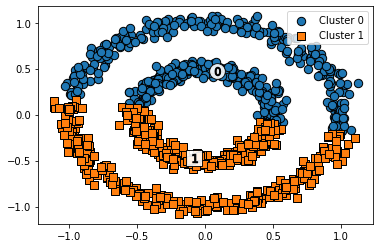

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

=> 평균점을 중심으로 군집화했기 때문에 제대로 군집화하지 못함

## DBSCAN을 통한 군집화

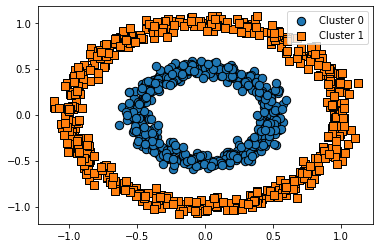

In [14]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

=> 밀도에 따른 군집화가 잘 이루어짐